In [1]:
import math
import numpy as np
from scipy import signal
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import fuzzy_reg
%matplotlib inline

In [2]:
In = 0.06
M = 0.4
dT = 0.1
g = 9.81
L = 0.38
TotalTime = 5
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)

/home/stepan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


In [3]:
sys_tf = signal.TransferFunction([1], [In, 0, -L * M * g])
print(sys_tf)

TransferFunctionContinuous(
array([16.66666667]),
array([  1.   ,   0.   , -24.852]),
dt: None
)


/home/stepan/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


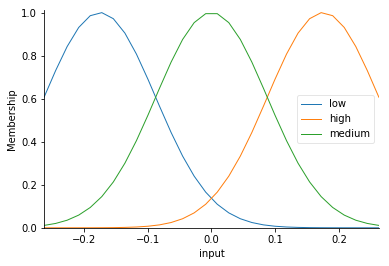

In [4]:
max_angle = 15 / 180 * math.pi
inp_discr = 1 / 180 * math.pi
inp_mean = 10 / 180 * math.pi
inp_sigma = 5 / 180 * math.pi
inp_values = np.linspace(-max_angle, max_angle, int(2 * max_angle
/ inp_discr) + 1)
input = ctrl.Antecedent(inp_values, 'input')
input['low'] = fuzz.gaussmf(input.universe, -inp_mean, inp_sigma)
input['high'] = fuzz.gaussmf(input.universe, inp_mean, inp_sigma)
input['medium'] = fuzz.gaussmf(input.universe, 0, inp_sigma)

input.view()
plt.show()

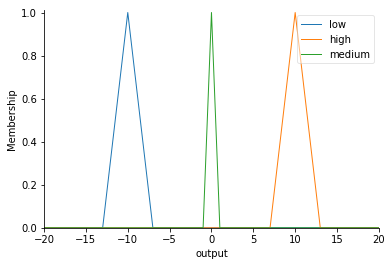

In [5]:
max_output = 20
output_discr = 1
outp_mean = 10
outp_hbreadth = 3
outp_values = np.linspace(-max_output, max_output, int(2 *
max_output / output_discr) + 1)
output = ctrl.Consequent(outp_values, 'output')
output['low'] = fuzz.trimf(output.universe, [-outp_mean -
outp_hbreadth, -outp_mean, -outp_mean + outp_hbreadth])
output['high'] = fuzz.trimf(output.universe, [outp_mean -
outp_hbreadth, outp_mean, outp_mean + outp_hbreadth])
output['medium'] = fuzz.trimf(output.universe, [-outp_hbreadth/3, 0, outp_hbreadth/3])
output.view()
plt.show()

In [6]:
rule1 = ctrl.Rule(input['low'] , output['high'])
rule2 = ctrl.Rule(input['high'] , output['low'])
rule3 = ctrl.Rule(input['medium'], output['medium'])

In [7]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

In [8]:
simulation = ctrl.ControlSystemSimulation(control_system)
simulation.input['input'] = 0.1
simulation.compute()
print(simulation.output['output'])

-7.581656586232713


### Pa6oTocnoco6HocTb npoBepeHa

In [9]:
# создаём управляемую систему
dT = 0.01
TotalTime = 20
moments_num = int(TotalTime/dT) + 1
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
A,B,C,D = signal.tf2ss([1], [In, 0, -L * M * g])
print(A,B,C,D)
sys_tf = signal.StateSpace(A,B,C,D)
# создаём нечёткий регулятор
fc = fuzzy_reg.FuzzyController()
# выведем зависимость выхода от входа
fc.plot()
# задаём начальные условия
init_angle = 1 / 180 * math.pi
out_pos = np.zeros(moments_num + 1)
out_pos[0] = init_angle
curr_state = [0, out_pos[0]/16.6
             ]
# для каждого момента времени
for i in range(moments_num):
    # вычислим сигнал нечёткого регулятора
    inp = fc.calc(curr_state[1]*40) # передаём угол, а не переменную состояния
    # вычислим выход управляемой системы по входу
    Tout,yout,xout = signal.lsim(sys_tf, [inp,inp], [0,dT],
    X0=curr_state)
    curr_state = xout[-1]
    out_pos[i+1] = yout[-1]

limit = 15 / 180 * np.pi
axes = plt.gca()
axes.set_ylim([-1, 1])
axes.set_xlim([0, 20])
axes = plt.plot(Tin, out_pos[:-1],'b')
axes = plt.plot([0, TotalTime], [limit, limit], 'r')
axes = plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()

[[-0.    24.852]
 [ 1.     0.   ]] [[1.]
 [0.]] [[ 0.         16.66666667]] [[0.]]


/home/stepan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


AssertionError: abc requires the three elements a <= b <= c.